<a href="https://colab.research.google.com/github/huu0224/c-study/blob/main/%EB%B0%B0%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(precision=3)  #모든 넘파이 배열 원소를 소수점 아래 3자리까지만 출력

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[A] 넘피

1) 4개의 1차원 배열 만들기

In [ ]:
a = np.arange(1, 21)
print(a)
print(a.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(20,)


In [ ]:
b = np.linspace(0, 1, 20)
print(b)
print(b.shape)

[0.    0.053 0.105 0.158 0.211 0.263 0.316 0.368 0.421 0.474 0.526 0.579
 0.632 0.684 0.737 0.789 0.842 0.895 0.947 1.   ]
(20,)


In [ ]:
np.random.seed(1)
c = np.random.randint(1, 3, size=(20,))
print(c)
print(c.shape)

[2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 1 1]
(20,)


In [ ]:
np.random.seed(2)
d = np.random.normal(size=(20,))
print(d)
print(d.shape)

[-0.417 -0.056 -2.136  1.64  -1.793 -0.842  0.503 -1.245 -1.058 -0.909
  0.551  2.292  0.042 -1.118  0.539 -0.596 -0.019  1.175 -0.748  0.009]
(20,)


2) 배열 d에서 음수의 합

In [ ]:
np.sum(d[d<0])

np.float64(-10.937738232282738)

3) 배열 d에서 최댓값의 인덱스

In [ ]:
np.argmax(d)

np.int64(11)

4) 이차원 배열 만들기

In [ ]:
#1차원 배열을 2차원 배열로 변환
a2 = a.reshape((20,1))   #a2 = a[:, np.newaxis]
b2 = b.reshape((20,1))   #b2 = b[:, np.newaxis]
c2 = c.reshape((20,1))   #c2 = c[:, np.newaxis]
d2 = d.reshape((20,1))   #d2 = d[:, np.newaxis]

In [ ]:
#방법1
m = np.concatenate([a2,b2,c2,d2], axis=1)
print(m[:5])

[[ 1.     0.     2.    -0.417]
 [ 2.     0.053  2.    -0.056]
 [ 3.     0.105  1.    -2.136]
 [ 4.     0.158  1.     1.64 ]
 [ 5.     0.211  2.    -1.793]]


In [ ]:
#방법2
m = np.hstack([a2,b2,c2,d2])
print(m[:5])

[[ 1.     0.     2.    -0.417]
 [ 2.     0.053  2.    -0.056]
 [ 3.     0.105  1.    -2.136]
 [ 4.     0.158  1.     1.64 ]
 [ 5.     0.211  2.    -1.793]]


In [ ]:
hm = np.c_[a,b,c,d]   #1차원 배열을 그대로 사용
print(m[:5])

[[ 1.     0.     2.    -0.417]
 [ 2.     0.053  2.    -0.056]
 [ 3.     0.105  1.    -2.136]
 [ 4.     0.158  1.     1.64 ]
 [ 5.     0.211  2.    -1.793]]


5) 칼럼 평균 구하기

In [ ]:
np.mean(m, axis=0)

array([10.5  ,  0.5  ,  1.55 , -0.209])

6) 2번 칼럼이 1인 행만 출력하기

In [ ]:
m[m[:, 2] == 1, :]

array([[ 3.000e+00,  1.053e-01,  1.000e+00, -2.136e+00],
       [ 4.000e+00,  1.579e-01,  1.000e+00,  1.640e+00],
       [ 1.000e+01,  4.737e-01,  1.000e+00, -9.090e-01],
       [ 1.100e+01,  5.263e-01,  1.000e+00,  5.515e-01],
       [ 1.300e+01,  6.316e-01,  1.000e+00,  4.154e-02],
       [ 1.600e+01,  7.895e-01,  1.000e+00, -5.962e-01],
       [ 1.700e+01,  8.421e-01,  1.000e+00, -1.913e-02],
       [ 1.900e+01,  9.474e-01,  1.000e+00, -7.479e-01],
       [ 2.000e+01,  1.000e+00,  1.000e+00,  9.025e-03]])

[B] 판다스 / 매틀플립

1) 데이터프레임 만들기

In [ ]:
titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2024_A/titanic.csv", index_col='PassengerId')

In [ ]:
df = titanic.drop('Name', axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 10)

행의 개수는 891, 열의 개수는 10개이다.

In [ ]:
print('# of rows =', df.shape[0])
print('# of columnss =', df.shape[1])

# of rows = 891
# of columnss = 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


결측치가 있는 칼럼은 Age, Cabin, Embarked 이다. 아래와 같이 isnull() 메서드를 사용하여 구할 수도 있다.

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687
Embarked,2


2) 나이의 여러 통계량(집계) 구하기

In [ ]:
print('개수 =', df['Age'].count())
print('평균 =', df['Age'].mean())
print('표준편차 =', df['Age'].std())
print('최솟값 =', df['Age'].min())
print('최댓값 =', df['Age'].max())

개수 = 714
평균 = 29.69911764705882
표준편차 = 14.526497332334044
최솟값 = 0.42
최댓값 = 80.0


describe() 메서드를 사용하면 모든 기술통계량을 한번에 구할 수 있다.

3) 나이 히스토그램(분포)

In [ ]:
#차트에 한글 폰트를 사용하기 위한 코드
import sys
if 'google.colab' in sys.modules:
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
#bins10 = list(range(0,100, 10))
bins10 = np.arange(0, 100, 10)
bins10

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

히스토그램에서 막대의 간격을 설정하기 위해 bins10 리스트를 만듦 (히스토그램의 bins 인수는 막대의 개수(정수)를 설정하거나 넘파이 배열(혹은 리스트)로 막대 간격을 직접 설정할 수 있음)

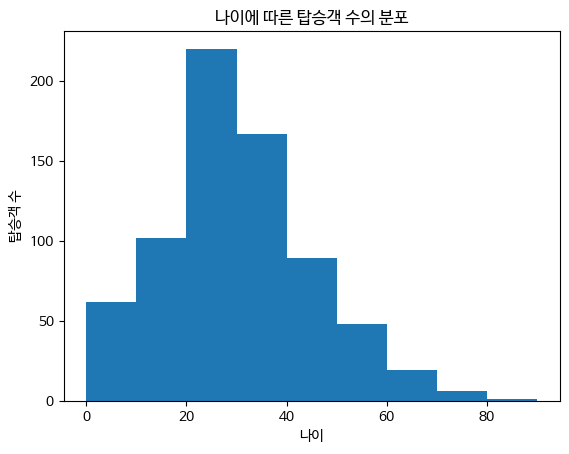

In [ ]:
plt.hist(df['Age'], bins = bins10)
plt.xlabel('나이')
plt.ylabel('탑승객 수')
plt.title('나이에 따른 탑승객 수의 분포');

4) 생존자 수 vs 사망자 수

In [ ]:
#방법 1 : 조건부 집계
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

,Survived
Survived,
0,549
1,342


In [ ]:
#방법 2 : value_counts() 메서드 사용하기
survived_count = df['Survived'].value_counts()

In [ ]:
survived_count

,count
Survived,
0,549
1,342


In [ ]:
survived_count.index

Index([0, 1], dtype='int64', name='Survived')

In [ ]:
survived_count.values

array([549, 342])

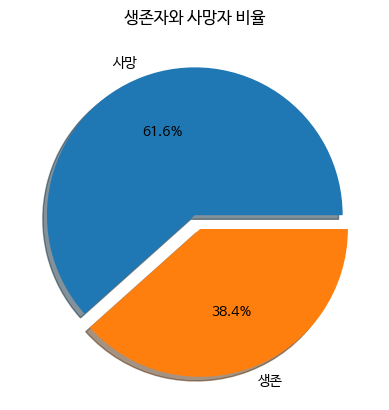

In [ ]:
plt.pie(survived_count, labels=['사망','생존'],
        explode=(0, 0.1), shadow=True, autopct = '%.1f%%')
plt.title('생존자와 사망자 비율');

5) 성별 생존율

In [ ]:
survival_rate_by_sex = df[['Sex', 'Survived']].groupby('Sex').mean()
survival_rate_by_sex

,Survived
Sex,
female,0.742038
male,0.188908


Survived 변수가 0과 1로 코딩되어 있으므로 평균을 구하면 생존율을 알 수 있다. 남자보다 여자의 생존율이 훨씬 높은 것을 관찰할 수 있다.

In [ ]:
survival_rate_by_sex.index

Index(['female', 'male'], dtype='object', name='Sex')

In [ ]:
survival_rate_by_sex.values.ravel()

array([0.742, 0.189])

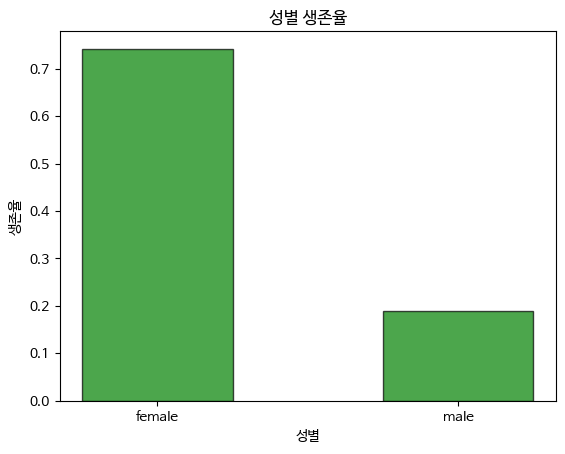

In [ ]:
plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values.ravel(),
        color='green', width=0.5, alpha=0.7, edgecolor='black')
plt.xlabel("성별")
plt.ylabel('생존율')
plt.title('성별 생존율');